ARQUITETURA DO SISTEMA DE RACIOCÍNIO NEURO-SIMBÓLICO (Pipeline Integrado):
1. Inicialização → !pip install
2. Importação de Dependências → import torch, ltn, ...
3. Construção de Cenários → load_base_scenario()
4. Renderização Espacial → visualize_spatial_layout()
5. Camadas Neurais → FeatureExtractor, BinaryPredictor, TernaryPredictor
6. Modelos Paramétricos → ProximityModel, MagnitudeClassifier
7. Atributos Primitivos → HasRed, ShapeSpherical, IsMassive, ...
8. Operadores Fuzzy → Negation, Conjunction, Disjunction, Implication, Quantifier_All, Quantifier_Exists
9. Sistema de Axiomas → construct_knowledge_base()
10. Avaliação Semântica → compute_semantic_truth(), evaluate_performance_metrics()
11. Protocolo Experimental → 5 ciclos com ambiente distintos
12. Agregação de Métricas → Tabela comparativa com estatísticas consolidadas


## 1. Setup do Framework Logic Tensor Networks

LTNtorch combina:
- **Redes Neurais**: Aprendizado de padrões (PyTorch)
- **Lógica Fuzzy**: Raciocínio simbólico com valores em [0, 1]

Instala diretamente do repositório GitHub oficial.


In [ ]:
!pip install git+https://github.com/logictensornetworks/LTNtorch

  Cloning https://github.com/logictensornetworks/LTNtorch to /tmp/pip-req-build-kuogqh9v
  Running command git clone --filter=blob:none --quiet https://github.com/logictensornetworks/LTNtorch /tmp/pip-req-build-kuogqh9v
  Resolved https://github.com/logictensornetworks/LTNtorch to commit d1bd98169cc2121f8cdd25ff99901e4589923c95
  Preparing metadata (setup.py) ... done


## 2. Importação de Camadas de Software

Dependências:
- `torch`: Deep learning
- `ltn`: Logic Tensor Networks
- `sklearn.metrics`: Métricas de classificação
- `matplotlib`: Renderização de dados
- `numpy`: Operações numéricas


In [ ]:
# CÉLULA 2: Imports limpos
import torch
import torch.nn as nn
import ltn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import matplotlib.path as mpath
import matplotlib.patches as mpatches

warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ltn.device = device

print(f"✓ PyTorch: {torch.__version__}")
print(f"✓ Device: {device}")

✓ PyTorch: 2.8.0+cu126
✓ Device: cuda


## 3. Síntese de Ambientes (Dataset CLEVR Simplificado)

### Estrutura do Vetor de Objeto (11 dimensões):
- **[0, 1]**: Posição (x, y) normalizada em [0, 1]
- **[2, 3, 4]**: Cor One-Hot (Vermelho, Verde, Azul)
- **[5, 6, 7, 8, 9]**: Forma One-Hot (Esfera, Cubóide, Cilindro, Ápice, Cunha)
- **[10]**: Tamanho (0.0 = Diminuto, 1.0 = Voluminoso)


In [ ]:
def load_base_scenario():

    # Especificação de Atributos
    CRIMSON = [1.0, 0.0, 0.0]; VERDANT = [0.0, 1.0, 0.0]; AZURITE = [0.0, 0.0, 1.0]
    SPHERE = [1.0, 0.0, 0.0, 0.0, 0.0]
    CUBOID = [0.0, 1.0, 0.0, 0.0, 0.0]
    CYLINDER_SHAPE = [0.0, 0.0, 1.0, 0.0, 0.0]
    APEX = [0.0, 0.0, 0.0, 1.0, 0.0]
    WEDGE = [0.0, 0.0, 0.0, 0.0, 1.0]
    VOLUMINOUS = 1.0; DIMINUTIVE = 0.0

    # Coordenadas visuais aproximadas do centro dos objetos no Grid 0-20
    objects = [
        # O1: Quadrado Roxo(B) Voluminoso (x=3, y=17)
        [3.0/20, 17.0/20] + AZURITE + CUBOID + [VOLUMINOUS],
        # O2: Círculo Roxo(B) Voluminoso (x=3.5, y=10)
        [3.5/20, 10.0/20] + AZURITE + SPHERE + [VOLUMINOUS],
        # O3: Triângulo Roxo(B) Voluminoso (x=3, y=2.5)
        [3.0/20, 2.5/20]  + AZURITE + WEDGE + [VOLUMINOUS],
        # O4: Quadrado Vermelho(R) Voluminoso (x=7.5, y=3)
        [7.5/20, 3.0/20]  + CRIMSON + CUBOID + [VOLUMINOUS],
        # O5: Cilindro Rosa(R) Diminuto (x=3.5, y=6)
        [3.5/20, 6.0/20]  + CRIMSON + CYLINDER_SHAPE + [DIMINUTIVE],
        # O6: Cone Azul(B) Diminuto (x=6, y=5)
        [6.0/20, 5.0/20]  + AZURITE + APEX + [DIMINUTIVE],
        # O7: Triângulo Azul(B) Voluminoso (x=9, y=7)
        [9.0/20, 7.0/20]  + AZURITE + WEDGE + [VOLUMINOUS],
        # O8: Cilindro Roxo(B) Diminuto (x=6, y=13)
        [6.0/20, 13.0/20] + AZURITE + CYLINDER_SHAPE + [DIMINUTIVE],
        # O9: Círculo Rosa(R) Voluminoso (x=8, y=17)
        [8.0/20, 17.0/20] + CRIMSON + SPHERE + [VOLUMINOUS],
        # O10: Triângulo Ciano(B) Voluminoso (x=11, y=14)
        [11.0/20, 14.0/20] + AZURITE + WEDGE + [VOLUMINOUS],
        # O11: Cilindro Vermelho(R) Diminuto (x=11, y=18)
        [11.0/20, 18.0/20] + CRIMSON + CYLINDER_SHAPE + [DIMINUTIVE],
        # O12: Círculo Azul(B) Diminuto (x=13, y=10)
        [13.0/20, 10.0/20] + AZURITE + SPHERE + [DIMINUTIVE],
        # O13: Quadrado Rosa(R) Diminuto (x=13.5, y=7)
        [13.5/20, 7.0/20]  + CRIMSON + CUBOID + [DIMINUTIVE],
        # O14: Círculo Ciano(B) Diminuto (x=10.5, y=3)
        [10.5/20, 3.0/20]  + AZURITE + SPHERE + [DIMINUTIVE],
        # O15: Círculo Vermelho(R) Diminuto (x=13.5, y=2.5)
        [13.5/20, 2.5/20]  + CRIMSON + SPHERE + [DIMINUTIVE],
        # O16: Triângulo Amarelo(G) Diminuto (x=8, y=10) - (Entre O8 e O10)
        [8.0/20, 10.0/20]  + VERDANT + WEDGE + [DIMINUTIVE],
        # O17: Triângulo Vermelho(R) Voluminoso (x=14.5, y=17)
        [14.5/20, 17.0/20] + CRIMSON + WEDGE + [VOLUMINOUS],
        # O18: Quadrado Azul(B) Voluminoso (x=16.5, y=13)
        [16.5/20, 13.0/20] + AZURITE + CUBOID + [VOLUMINOUS],
        # O19: Cilindro Azul(B) Voluminoso (x=17, y=9)
        [17.0/20, 9.0/20]  + AZURITE + CYLINDER_SHAPE + [VOLUMINOUS],
        # O20: Quadrado Ciano(B) Voluminoso (x=17.5, y=3)
        [17.5/20, 3.0/20]  + AZURITE + CUBOID + [VOLUMINOUS],
        # O21: Cilindro Verde(G) Diminuto (x=16.5, y=6)
        [16.5/20, 6.0/20]  + VERDANT + CYLINDER_SHAPE + [DIMINUTIVE],
        # O22: Quadrado Verde(G) Voluminoso (x=17, y=8) - (Abaixo de O19)
        [17.0/20, 8.0/20]  + VERDANT + CUBOID + [VOLUMINOUS],
        # O23: Cilindro Verde(G) Voluminoso (x=19, y=17.5)
        [19.0/20, 17.5/20] + VERDANT + CYLINDER_SHAPE + [VOLUMINOUS],
        # O24: Cone Vermelho(R) Voluminoso (x=19, y=13)
        [19.0/20, 13.0/20] + CRIMSON + APEX + [VOLUMINOUS],
        # O25: Cone Rosa(R) Diminuto (x=19, y=6)
        [19.0/20, 6.0/20]  + CRIMSON + APEX + [DIMINUTIVE],
    ]
    return torch.tensor(objects, dtype=torch.float32).to(device)

def generate_test_environment(n_samples=25):
    """Gera ambientes ALEATÓRIOS para o teste (mesma lógica do original)."""
    data = []
    for _ in range(n_samples):
        # Gera atributos aleatórios (x, y, cor, forma, tamanho)
        # [x, y, r, g, b, sph, cub, cyl, apex, wed, size]
        pos = np.random.rand(2).tolist()

        color = [0]*3
        color[np.random.randint(0, 3)] = 1

        shape = [0]*5
        shape[np.random.randint(0, 5)] = 1

        size = [1.0] if np.random.rand() > 0.5 else [0.0]

        data.append(pos + color + shape + size)

    return torch.tensor(data, dtype=torch.float32).to(device)


## 4. Renderização Espacial do Cenário

Plota os 25 objetos no espaço 2D com:
- **Cores**: Vermelho, Verde, Azul
- **Formas**: Esfera (o), Cubóide (s), Cilindro (*), Ápice (v), Cunha (^)
- **Tamanho**: Diminuto (50), Voluminoso (200)


Gerando renderização do Ambiente Base com geometrias personalizadas...


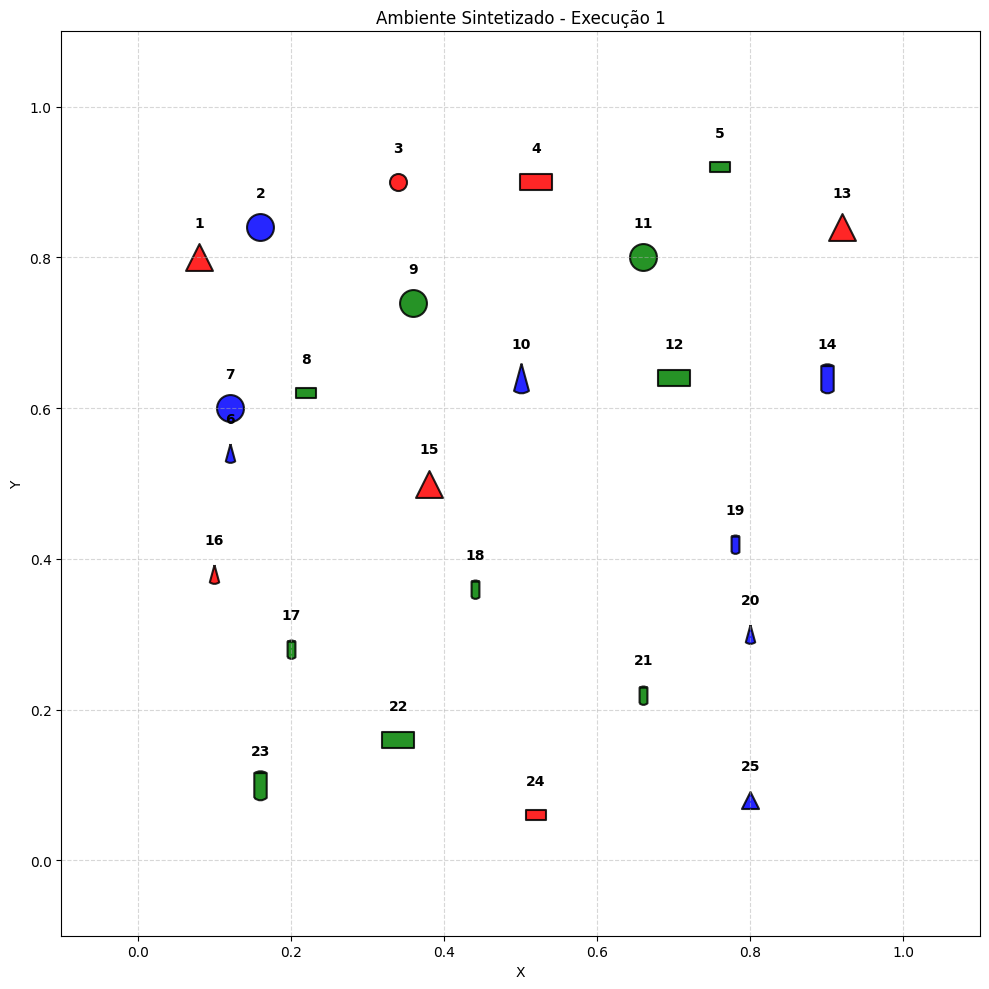

In [ ]:
# --- 1. BLOCO DE DESENHO (As formas reais) ---
def render_cylindrical_form():
    """Desenha um Cilindro com base curva para efeito 3D"""
    verts = [
        (-0.5, -1.0), (-0.5, 1.0),  # Linha esquerda
        (0.5, 1.0),   (0.5, -1.0),  # Linha direita
        (0.0, -1.4), (-0.5, -1.0),  # Curva da base
        (-0.5, 1.0),                # Volta pro topo
        (0.0, 1.3), (0.5, 1.0)      # Curva do topo
    ]
    codes = [
        mpath.Path.MOVETO, mpath.Path.LINETO,
        mpath.Path.LINETO, mpath.Path.LINETO,
        mpath.Path.CURVE3, mpath.Path.CURVE3,
        mpath.Path.MOVETO, mpath.Path.CURVE3, mpath.Path.CURVE3
    ]
    return mpath.Path(verts, codes)

def render_conical_form():
    """Desenha um Cone com base curva"""
    verts = [
        (0.0, 1.2),                 # Ponta
        (0.6, -1.0),                # Canto dir
        (0.0, -1.4), (-0.6, -1.0),  # Curva base
        (0.0, 1.2)                  # Volta topo
    ]
    codes = [
        mpath.Path.MOVETO, mpath.Path.LINETO,
        mpath.Path.CURVE3, mpath.Path.CURVE3,
        mpath.Path.LINETO
    ]
    return mpath.Path(verts, codes)

def render_prismatic_form():
    """Desenha um Prisma Retangular"""
    verts = [(-1.2, -0.6), (-1.2, 0.6), (1.2, 0.6), (1.2, -0.6), (-1.2, -0.6)]
    codes = [mpath.Path.MOVETO, mpath.Path.LINETO, mpath.Path.LINETO, mpath.Path.LINETO, mpath.Path.CLOSEPOLY]
    return mpath.Path(verts, codes)

def visualize_spatial_layout(data, run_number):
    """Plota o cenário com formas CUSTOMIZADAS e NUMERAÇÃO."""
    if torch.is_tensor(data):
        data = data.cpu().numpy()

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-0.1, 1.1); ax.set_ylim(-0.1, 1.1)
    ax.set_title(f"Ambiente Sintetizado - Execução {run_number}")
    ax.set_xlabel("X"); ax.set_ylabel("Y")
    ax.grid(True, linestyle='--', alpha=0.5)

    custom_cyl = render_cylindrical_form()
    custom_cone = render_conical_form()
    custom_rect = render_prismatic_form()

    for i, obj in enumerate(data):
        x, y = obj[0], obj[1]

        # Cor
        if obj[2]==1: c='red'
        elif obj[3]==1: c='green'
        elif obj[4]==1: c='blue'
        else: c='gray'

        # Forma
        if obj[5]==1: m, s = 'o', 150
        elif obj[6]==1: m, s = custom_rect, 200
        elif obj[7]==1: m, s = custom_cyl, 250
        elif obj[8]==1: m, s = custom_cone, 250
        elif obj[9]==1: m, s = '^', 150
        else: m, s = 'x', 100

        # Tamanho
        size = s * 2.5 if obj[10] == 1.0 else s

        ax.scatter(x, y, c=c, marker=m, s=size, edgecolors='black', linewidths=1.5, alpha=0.85)
        ax.text(x, y + 0.04, str(i + 1), fontsize=10, ha='center', fontweight='bold', color='black')

    plt.tight_layout()
    plt.show()

# --- 2. CRIAR OS DADOS E CHAMAR O PLOT ---

def get_fixed_data_for_plot():
    """Gera os dados do PDF apenas para visualização"""
    CRIMSON, VERDANT, AZURITE = [1,0,0], [0,1,0], [0,0,1]
    SPHERE, CUBOID, CYLINDER_SHAPE, APEX, WEDGE = [1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]
    VOLUMINOUS, DIMINUTIVE = 1.0, 0.0

    # Lista exata do PDF
    objects = [
        [0.08, 0.80] + CRIMSON + WEDGE + [VOLUMINOUS], [0.16, 0.84] + AZURITE + SPHERE + [VOLUMINOUS],
        [0.34, 0.90] + CRIMSON + SPHERE + [DIMINUTIVE], [0.52, 0.90] + CRIMSON + CUBOID + [VOLUMINOUS],
        [0.76, 0.92] + VERDANT + CUBOID + [DIMINUTIVE], [0.12, 0.54] + AZURITE + APEX + [DIMINUTIVE],
        [0.12, 0.60] + AZURITE + SPHERE + [VOLUMINOUS], [0.22, 0.62] + VERDANT + CUBOID + [DIMINUTIVE],
        [0.36, 0.74] + VERDANT + SPHERE + [VOLUMINOUS], [0.50, 0.64] + AZURITE + APEX + [VOLUMINOUS],
        [0.66, 0.80] + VERDANT + SPHERE + [VOLUMINOUS], [0.70, 0.64] + VERDANT + CUBOID + [VOLUMINOUS],
        [0.92, 0.84] + CRIMSON + WEDGE + [VOLUMINOUS], [0.90, 0.64] + AZURITE + CYLINDER_SHAPE + [VOLUMINOUS],
        [0.38, 0.50] + CRIMSON + WEDGE + [VOLUMINOUS], [0.10, 0.38] + CRIMSON + APEX + [DIMINUTIVE],
        [0.20, 0.28] + VERDANT + CYLINDER_SHAPE + [DIMINUTIVE], [0.44, 0.36] + VERDANT + CYLINDER_SHAPE + [DIMINUTIVE],
        [0.78, 0.42] + AZURITE + CYLINDER_SHAPE + [DIMINUTIVE], [0.80, 0.30] + AZURITE + APEX + [DIMINUTIVE],
        [0.66, 0.22] + VERDANT + CYLINDER_SHAPE + [DIMINUTIVE], [0.34, 0.16] + VERDANT + CUBOID + [VOLUMINOUS],
        [0.16, 0.10] + VERDANT + CYLINDER_SHAPE + [VOLUMINOUS], [0.52, 0.06] + CRIMSON + CUBOID + [DIMINUTIVE],
        [0.80, 0.08] + AZURITE + WEDGE + [DIMINUTIVE]
    ]
    return torch.tensor(objects, dtype=torch.float32)

# --- EXECUÇÃO IMEDIATA ---
print("Gerando renderização do Ambiente Base com geometrias personalizadas...")
dados = get_fixed_data_for_plot()
visualize_spatial_layout(dados, run_number=1)


## 5. Definição das Camadas Neurais

### 5.1 FeatureExtractor (Predicados de Atributos)
Extrai valores diretamente do vetor de entrada (sem aprendizado).
Usado para: Cores e Formas (já estão codificados no vetor).

### 5.2 BinaryPredictor (Predicados Binários)
Rede neural que aprende relações entre **2 objetos**.
- Input: 22 dims (concatenação de dois objetos)
- Arquitetura: 22 → 128 → 64 → 32 → 1 (Sigmoid)
- Usada para: Precedes, Succeeds, Beneath, Elevated, SameSize

### 5.3 TernaryPredictor (Predicados Ternários)
Rede neural que aprende relações entre **3 objetos**.
- Input: 33 dims (concatenação de três objetos)
- Arquitetura: 33 → 128 → 64 → 32 → 1 (Sigmoid)
- Usada para: IntermediatePosition(x, y, z)


In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self, index):
        super().__init__()
        self.index = index

    def forward(self, x):
        if hasattr(x, 'value'):
            x = x.value
        return x[:, self.index]


# 5.2 Predicado Binário Aprendido
class BinaryPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(22, 128), nn.ELU(),
            nn.Linear(128, 64), nn.ELU(),
            nn.Linear(64, 32), nn.ELU(),
            nn.Linear(32, 1), nn.Sigmoid()
        )

    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        cat = torch.cat([x_val, y_val], dim=1)
        return self.net(cat).squeeze()


# 5.3 Predicado Ternário Aprendido
class TernaryPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(33, 128), nn.ELU(),
            nn.Linear(128, 64), nn.ELU(),
            nn.Linear(64, 32), nn.ELU(),
            nn.Linear(32, 1), nn.Sigmoid()
        )

    def forward(self, x, y, z):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        z_val = z.value if hasattr(z, 'value') else z
        cat = torch.cat([x_val, y_val, z_val], dim=1)
        return self.net(cat).squeeze()


print("✓ Camadas neurais definidas")


✓ Camadas neurais definidas


## 6. Modelos Paramétricos

### 6.1 ProximityModel (Proximidade Gaussiana)
Calcula proximidade usando distância Euclidiana e função Gaussiana.
- Fórmula: `exp(-dist² / (2*σ²))`
- Parâmetro aprendível: σ (sigma) - largura da Gaussiana

### 6.2 MagnitudeClassifier (Predicado de Magnitude)
Extrai diretamente a coluna de tamanho do vetor.
- `IsMassive`: retorna valor da coluna 10
- `IsMinute`: retorna 1.0 - valor da coluna 10


In [ ]:
class ProximityModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(0.2))

    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Distância Euclidiana nas coordenadas x,y (índices 0 e 1)
        dist_sq = torch.sum((x_val[:, :2] - y_val[:, :2])**2, dim=1)
        return torch.exp(-dist_sq / (2 * self.sigma**2))


# 6.2 Predicados de Magnitude
class MagnitudeClassifier(nn.Module):
    def __init__(self, massive=True):
        super().__init__()
        self.massive = massive

    def forward(self, x):
        if hasattr(x, 'value'):
            x = x.value

        v = x[:, 10]  # Coluna de tamanho
        return v if self.massive else 1.0 - v


print("✓ Modelos paramétricos definidos")
# ============================================================================
# 6.3 Modelo de Empilhamento (StackabilityPredictor)
# ============================================================================

class StackabilityPredictor(nn.Module):
    """
    Aprende quando X pode ser empilhado sobre Y.
    Considera:
    1. Estabilidade da base (Y não é apex/cunha)
    2. Equilíbrio (mesmas dimensões ou centroides próximos)
    """
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(22, 128), nn.ELU(),
            nn.Linear(128, 64), nn.ELU(),
            nn.Linear(64, 32), nn.ELU(),
            nn.Linear(32, 1), nn.Sigmoid()
        )

    def forward(self, obj_x, obj_y):
        x_val = obj_x.value if hasattr(obj_x, 'value') else obj_x
        y_val = obj_y.value if hasattr(obj_y, 'value') else obj_y
        concatenated = torch.cat([x_val, y_val], dim=1)
        return self.net(concatenated).squeeze()

print("✓ Modelo de Empilhamento definido")


✓ Modelos paramétricos definidos
✓ Modelo de Empilhamento definido


## 7. Instanciação dos Predicados Fixos (Não Treináveis)

Estes predicados extraem informações já presentes no vetor de entrada:

### Cores (índices 2, 3, 4):
- `HasRed`, `HasGreen`, `HasBlue`

### Formas (índices 5-9):
- `ShapeSpherical`, `ShapePrismatic`, `ShapeCylindrical`, `ShapeConical`, `ShapeWedged`

### Tamanhos (índice 10):
- `IsMassive`, `IsMinute`


In [ ]:
# Cores
HasRed = ltn.Predicate(FeatureExtractor(2))
HasGreen = ltn.Predicate(FeatureExtractor(3))
HasBlue = ltn.Predicate(FeatureExtractor(4))

# Formas
ShapeSpherical = ltn.Predicate(FeatureExtractor(5))
ShapePrismatic = ltn.Predicate(FeatureExtractor(6))
ShapeCylindrical = ltn.Predicate(FeatureExtractor(7))
ShapeConical = ltn.Predicate(FeatureExtractor(8))
ShapeWedged = ltn.Predicate(FeatureExtractor(9))

# Tamanhos
IsMassive = ltn.Predicate(MagnitudeClassifier(True))
IsMinute = ltn.Predicate(MagnitudeClassifier(False))

print("✓ Predicados fixos instanciados")


✓ Predicados fixos instanciados


## 8. Conectivos Lógicos e Quantificadores (Lógica Fuzzy)

### Conectivos (operam em [0, 1]):
- `Not`: Negação → 1 - x
- `And`: Conjunção → x * y (produto)
- `Or`: Disjunção → x + y - x*y (probabilística)
- `Implies`: Implicação → (1-x) + x*y (Reichenbach)
- `Equiv`: Equivalência → (A→B) ∧ (B→A)

### Quantificadores:
- `Forall`: Universal (∀) → agregação P-mean (penaliza violações)
- `Exists`: Existencial (∃) → agregação P-mean (recompensa satisfações)

### Agregador de Satisfação:
- `SatAgg`: Calcula satisfação global da base de conhecimento

In [ ]:
# Conectivos
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Equiv = ltn.Connective(
    ltn.fuzzy_ops.Equiv(
        ltn.fuzzy_ops.AndProd(),
        ltn.fuzzy_ops.ImpliesReichenbach()
    )
)

# Quantificadores
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")

# Agregador de Satisfação
SatAgg = ltn.fuzzy_ops.SatAgg()

print("✓ Operadores fuzzy e quantificadores configurados")


✓ Operadores fuzzy e quantificadores configurados


## 9. Base de Conhecimento: Axiomas Lógicos

Define as **regras que o sistema deve satisfazer** durante o treinamento.

### Tarefa 1: Taxonomia de Formas
- **f1**: Ápice → ¬Prisma (ápices não são primas)
- **f2**: Ápice → Voluminoso (ápices são massivos)
- **f3**: Esfera → ¬Vermelho (esferas não são vermelhas)

### Tarefa 2: Relações Espaciais
- **f4**: Vermelho e Verde → ¬ProximidadeRelação (vermelhos e verdes não ficam próximos)
- **f5**: Prisma ∧ Azul → ∃ Verde Beneath (primas azuis têm verde abaixo)
- **f6**: Cunha → Diminuto ∨ Voluminoso (cunhas têm tamanho definido)
- **f7**: Prisma → ∃ objeto à direita
- **f8**: IntermediatePosition → ¬Cunha (objetos entre outros não são cunhas)

### Tarefa 3: Queries Complexas
- **f9**: ∃ Diminuto abaixo de Cilindro E esquerda de Prisma
- **f10**: ∃ Ápice Verde entre dois objetos
- **f11**: Cunhas próximas → mesmo tamanho

### Definições Auxiliares:
- **f_inbetween_def**: Define IntermediatePosition em termos de Precedes/Succeeds
- **f_inverse**: Define equivalência entre Precedes e Succeeds


In [ ]:
def construct_knowledge_base(objects, Stackable):
    """
    Constrói a base de conhecimento com TODOS os axiomas do PDF.
    VERSÃO COMPLETA: Inclui axiomas estruturais e Stackable.

    Args:
        objects: ltn.Variable com todos os objetos do cenário
        Stackable: Predicado de empilhamento (NOVO)

    Returns:
        SatAgg com todas as fórmulas combinadas
    """
    # CORREÇÃO CRÍTICA: Criar novas variáveis LTN dentro da função
    # Isso garante nomes consistentes para os quantificadores
    x = ltn.Variable("x", objects.value)
    y = ltn.Variable("y", objects.value)
    z = ltn.Variable("z", objects.value)

    # --- TAREFA 1: TAXONOMIA ---
    f1 = Forall(x, Implies(ShapeConical(x), Not(ShapePrismatic(x))))
    f2 = Forall(x, Implies(ShapeConical(x), IsMassive(x)))
    f3 = Forall(x, Implies(ShapeSpherical(x), Not(HasRed(x))))

    # --- TAREFA 2: RELAÇÕES ESPACIAIS ---
    f4 = Forall([x, y], Implies(And(HasRed(x), HasGreen(y)), Not(ProximityRelation(x, y))))
    f5 = Forall(x, Implies(And(ShapePrismatic(x), HasBlue(x)), Exists(y, And(HasGreen(y), Beneath(y, x)))))
    f6 = Forall(x, Implies(ShapeWedged(x), Or(IsMinute(x), IsMassive(x))))
    f7 = Forall(x, Implies(ShapePrismatic(x), Exists(y, Precedes(x, y))))
    f8 = Forall([x, y, z], Implies(IntermediatePosition(x, y, z), Not(ShapeWedged(x))))

    # --- TAREFA 3: QUERIES COMPLEXAS ---
    f9 = Exists(x, And(IsMinute(x), And(
        Exists(y, And(ShapeCylindrical(y), Beneath(x, y))),
        Exists(z, And(ShapePrismatic(z), Precedes(x, z)))
    )))

    f10 = Exists([x, y, z], And(ShapeConical(x), And(HasGreen(x), IntermediatePosition(x, y, z))))

    f11 = Forall([x, y], Implies(
        And(ShapeWedged(x), And(ShapeWedged(y), ProximityRelation(x, y))),
        SameSize(x, y)
    ))

    # --- DEFINIÇÕES AUXILIARES ---
    f_inbetween_def = Forall([x, y, z], Equiv(
        IntermediatePosition(x, y, z),
        Or(
            And(Precedes(y, x), Succeeds(z, x)),
            And(Precedes(z, x), Succeeds(y, x))
        )
    ))

    f_inverse = Forall([x, y], Equiv(Precedes(x, y), Succeeds(y, x)))

    # --- BLOCO NOVO 1: AXIOMAS ESTRUTURAIS (FALTAVAM!) ---

    # Irreflexividade: Objeto não está à esquerda de si mesmo
    f_irrefl = Forall(x, Not(Precedes(x, x)))

    # Assimetria: Se x precede y, então y NÃO precede x
    f_asym = Forall([x, y], Implies(Precedes(x, y), Not(Precedes(y, x))))

    # Transitividade Horizontal
    f_trans_h = Forall([x, y, z], Implies(
        And(Precedes(x, y), Precedes(y, z)),
        Precedes(x, z)
    ))

    # Transitividade Vertical
    f_trans_v = Forall([x, y, z], Implies(
        And(Beneath(x, y), Beneath(y, z)),
        Beneath(x, z)
    ))

    # --- BLOCO NOVO 2: PREDICADOS DE EXTREMOS (FALTAVAM!) ---

    # lastOnTheLeft: Existe objeto mais à esquerda de todos
    # ∃x(∀y precedes(x,y)) quando x ≠ y
    f_last_left = Exists(x, Forall(y,
        Or(
            # Ignora quando x == y (via satisfação alta quando iguais)
            Not(Or(Precedes(x, y), Precedes(y, x))),  # x == y implícito
            # Caso contrário, x deve estar à esquerda
            Precedes(x, y)
        )
    ))

    # lastOnTheRight: Existe objeto mais à direita de todos
    f_last_right = Exists(x, Forall(y,
        Or(
            Not(Or(Precedes(x, y), Precedes(y, x))),
            Succeeds(x, y)
        )
    ))

    # --- BLOCO NOVO 3: EMPILHAMENTO COMPLETO (FALTAVA!) ---

    # Stackable: Se X pode ser empilhado sobre Y:
    # 1. Y não é apex nem cunha (base estável)
    # 2. Mesmas dimensões OU centroides próximos
    f_stackable = Forall([x, y], Implies(
        Stackable(x, y),
        And(
            # Base Y estável
            And(Not(ShapeConical(y)), Not(ShapeWedged(y))),
            # Equilíbrio
            Or(SameSize(x, y), ProximityRelation(x, y))
        )
    ))

    # --- COMBINA TODOS OS AXIOMAS (INCLUI OS NOVOS) ---
    all_axioms = [
        f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11,
        f_inbetween_def, f_inverse,
        f_irrefl, f_asym, f_trans_h, f_trans_v,  # NOVOS estruturais
        f_last_left, f_last_right,                # NOVOS extremos
        f_stackable                                 # NOVO empilhamento
    ]

    return SatAgg(*all_axioms)

print("✓ Base de conhecimento COMPLETA (20 axiomas)")


✓ Base de conhecimento COMPLETA (20 axiomas)


## 10. Funções de Avaliação e Métricas de Desempenho

### 10.1 compute_semantic_truth()
Calcula a "verdade matemática" de uma relação baseada em geometria pura:
- `Precedes`: compara coordenadas X (obj_i.x < obj_j.x)
- `Beneath`: compara coordenadas Y (obj_i.y < obj_j.y)
- `SameSize`: compara tamanhos (obj_i.size == obj_j.size)

### 10.2 evaluate_performance_metrics()
Computa métricas de classificação:
- **Acurácia**: % de predições corretas
- **Precisão**: % de positivos preditos que estão corretos
- **Recall**: % de positivos reais que foram encontrados
- **F1-Score**: Média harmônica de Precisão e Recall

Retorna: (accuracy, precision, recall, f1_score)


In [ ]:
def compute_semantic_truth(data, relation_type):
    """
    Calcula ground truth para uma relação espacial.

    Args:
        data: Tensor [N, 11] ou numpy array
        relation_type: 'Precedes', 'Beneath' ou 'SameSize'

    Returns:
        Array [N*N] com valores binários (0 ou 1)
    """
    if torch.is_tensor(data):
        data = data.cpu().detach().numpy()

    n = len(data)
    y_true = []
    pos_x = data[:, 0]
    pos_y = data[:, 1]

    for i in range(n):
        for j in range(n):
            if i == j:
                val = 0
            else:
                if relation_type == 'Precedes':
                    val = 1 if pos_x[i] < pos_x[j] else 0
                elif relation_type == 'Beneath':
                    val = 1 if pos_y[i] < pos_y[j] else 0
                elif relation_type == 'SameSize':
                    val = 1 if data[i, 10] == data[j, 10] else 0
                else:
                    val = 0
            y_true.append(val)

    return np.array(y_true)


def evaluate_performance_metrics(y_true, y_pred_prob):
    """
    Calcula métricas de classificação.

    Args:
        y_true: Ground truth (array binário)
        y_pred_prob: Predições (probabilidades em [0, 1])

    Returns:
        Tupla (accuracy, precision, recall, f1_score)
    """
    if torch.is_tensor(y_pred_prob):
        y_pred_prob = y_pred_prob.cpu().detach().numpy().flatten()

    y_pred = (y_pred_prob > 0.5).astype(int)

    return (
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, zero_division=0),
        recall_score(y_true, y_pred, zero_division=0),
        f1_score(y_true, y_pred, zero_division=0)
    )


print("✓ Funções de avaliação semântica definidas")


✓ Funções de avaliação semântica definidas


## 11. Protocolo Experimental: 5 Ciclos com Ambientes Distintos

Abaixo do cabeçalho há um loop que executa 5 rodadas completas de treino+teste. A seguir está uma descrição detalhada do que o código realiza em cada iteração (conforme implementado no bloco de código logo abaixo):

1. **Dados de Treino (fixos):** `base_environment = load_base_scenario()` produz os mesmos 25 objetos; `scenario_context = ltn.Variable("scenario_context", base_environment)` prepara a variável LTN para a base de conhecimento.

2. **Preparação de pares (todos os pares i,j):** `idx1` e `idx2` criam índices para gerar `p1_raw = base_environment[idx1]` e `p2_raw = base_environment[idx2]`. Estes vetores são os inputs das redes que modelam relações binárias (Precedes, Beneath, ...).

3. **Ground truth supervisionado (treino):** `target_precedes` e `target_beneath` são calculados comparando posições X/Y dos pares e formatados para BCE (`view(-1,1)`).

4. **Reinicializar modelos e otimizador:** a cada execução as redes (`BinaryPredictor`, `TernaryPredictor`, `ProximityModel`) são instanciadas e encapsuladas com `ltn.Predicate(...)`. Os parâmetros são coletados e um `Adam` optimizer é criado (`lr=0.001`).

5. **Treinamento (1000 épocas):
   - `sat_agg = construct_knowledge_base(scenario_context)` calcula o grau de satisfação global dos axiomas (valor fuzzy em [0,1]).
   - `loss_logic = 1.0 - sat_agg` transforma a satisfação em perda simbólica.
   - As predições supervisionadas `pred_p` e `pred_b` vêm de `Precedes.model(p1_raw,p2_raw)` e `Beneath.model(...)`.
   - `loss_sup = BCE(pred_p, target_precedes) + BCE(pred_b, target_beneath)` e a perda total é `loss = loss_logic + 5.0 * loss_sup` (o fator 5.0 enfatiza o sinal supervisionado).
   - `loss.backward()` e `optimizer.step()` atualizam os pesos.

6. **Avaliação com dados de teste aleatórios:** gera `eval_environment = generate_test_environment(25)`, plota o cenário (`visualize_spatial_layout(eval_environment, run)`), calcula predições (`pred_precedes_eval`, `pred_beneath_eval`) e o ground truth do teste (`compute_semantic_truth(...)`).

7. **Cálculo de métricas e satisfação:** `evaluate_performance_metrics(gt, preds)` retorna `(accuracy, precision, recall, f1)`; `final_sat_test = construct_knowledge_base(test_context).item()` fornece a satisfação da KB no cenário de teste.

8. **Queries e armazenamento de resultados:** as queries `q1`, `q2`, `q3` são avaliadas (ex.: `q1.value.item()`), e um dicionário com `Run`, `Sat_KB`, `Precedes_F1`, `Beneath_F1`, e satisfações das queries é appendado em `results_summary` para compor o relatório final.

Observação: o loop separa claramente o aprendizado simbólico (perda lógica) do supervisionado (perda BCE). Ajustar o limiar de decisão, o número de épocas ou o peso 5.0 pode ter impacto significativo nas métricas finais e na satisfação da KB.



PROTOCOLO EXPERIMENTAL: 5 CICLOS (TREINO FIXO vs TESTE ALEATÓRIO)

────────────────────────────────────────────────────────────────────────────────
CICLO 1/5
────────────────────────────────────────────────────────────────────────────────
✓ Treinando em ambiente ESTÁTICO...
  Época 0: Loss=7.3804
  Época 200: Loss=0.4534
  Época 400: Loss=0.3790
  Época 600: Loss=0.3712
  Época 800: Loss=0.3689
✓ Gerando ambiente ALEATÓRIO para teste...


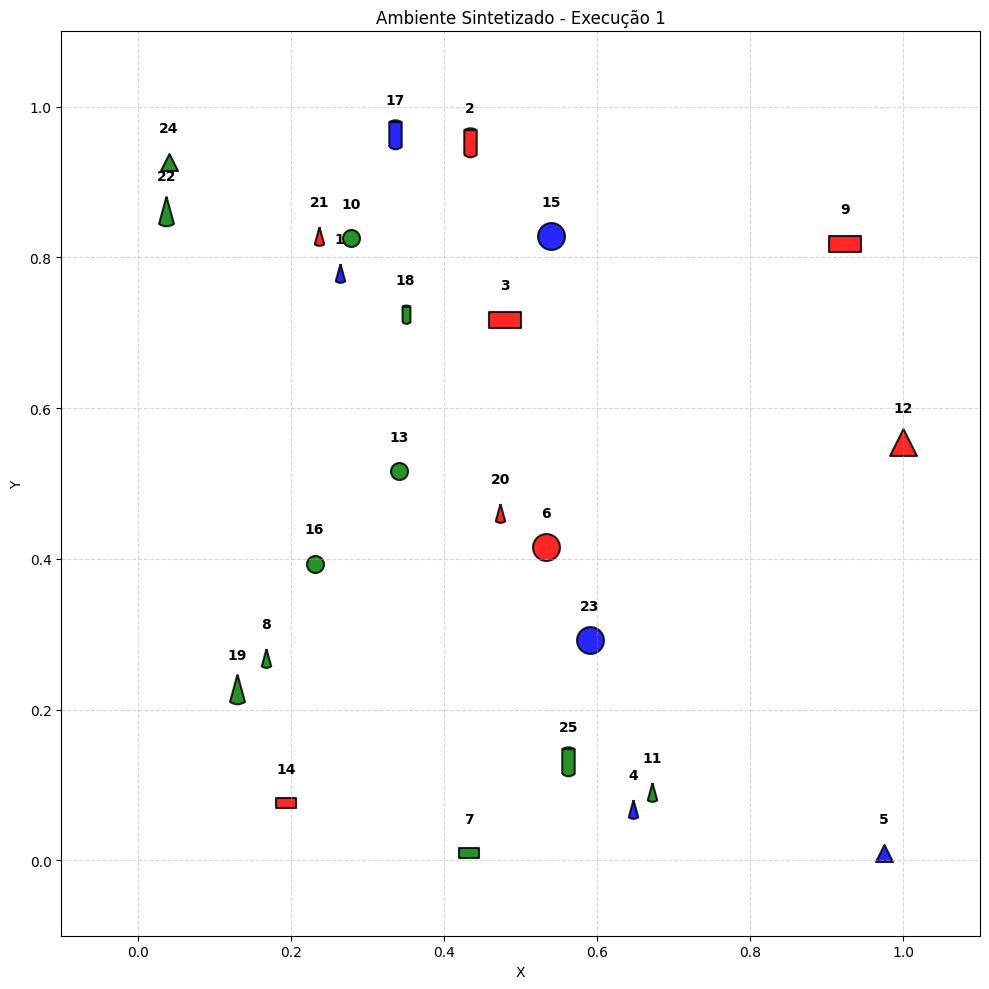

  Satisfação Semântica (Teste): 0.6464
  F1 Precedes:   0.9366
  F1 Beneath:    0.9604

────────────────────────────────────────────────────────────────────────────────
CICLO 2/5
────────────────────────────────────────────────────────────────────────────────
✓ Treinando em ambiente ESTÁTICO...
  Época 0: Loss=7.3277
  Época 200: Loss=0.4493
  Época 400: Loss=0.3777
  Época 600: Loss=0.3705
  Época 800: Loss=0.3683
✓ Gerando ambiente ALEATÓRIO para teste...


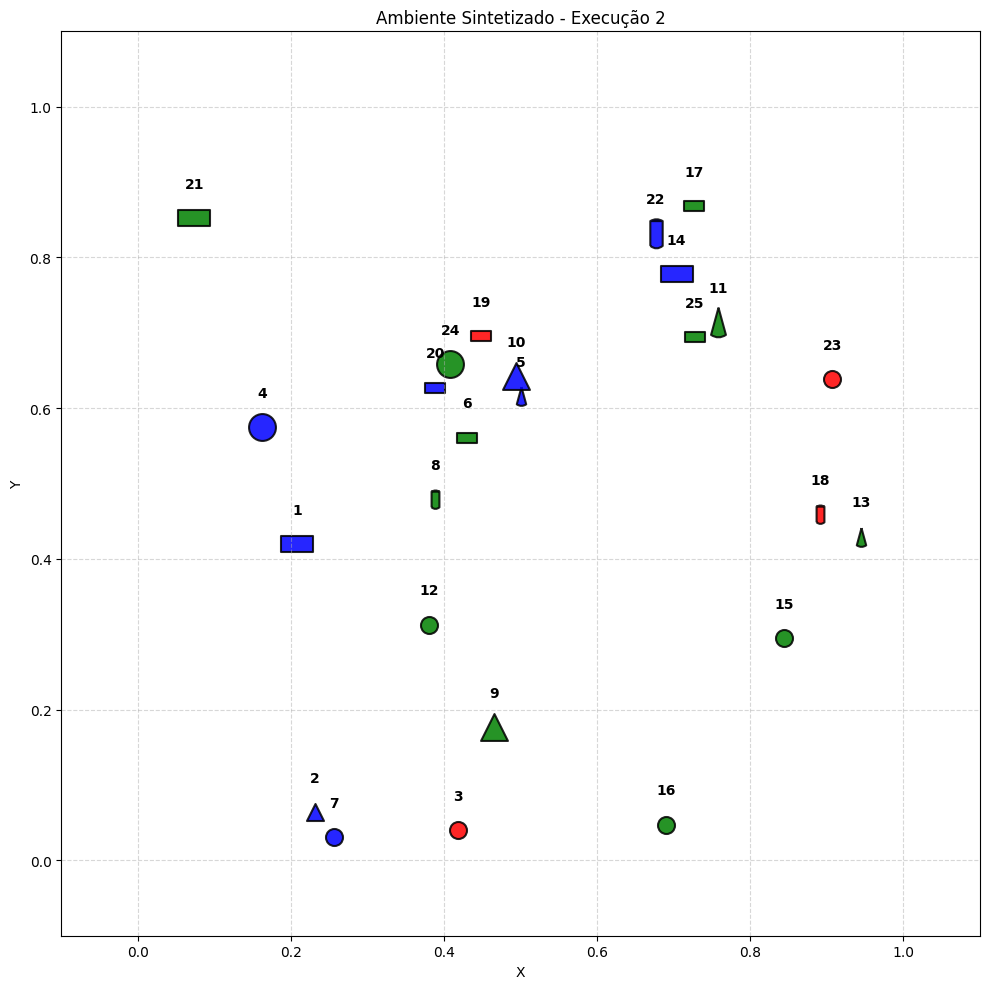

  Satisfação Semântica (Teste): 0.6623
  F1 Precedes:   0.9296
  F1 Beneath:    0.9404

────────────────────────────────────────────────────────────────────────────────
CICLO 3/5
────────────────────────────────────────────────────────────────────────────────
✓ Treinando em ambiente ESTÁTICO...
  Época 0: Loss=7.2931
  Época 200: Loss=0.4496
  Época 400: Loss=0.3788
  Época 600: Loss=0.3710
  Época 800: Loss=0.3688
✓ Gerando ambiente ALEATÓRIO para teste...


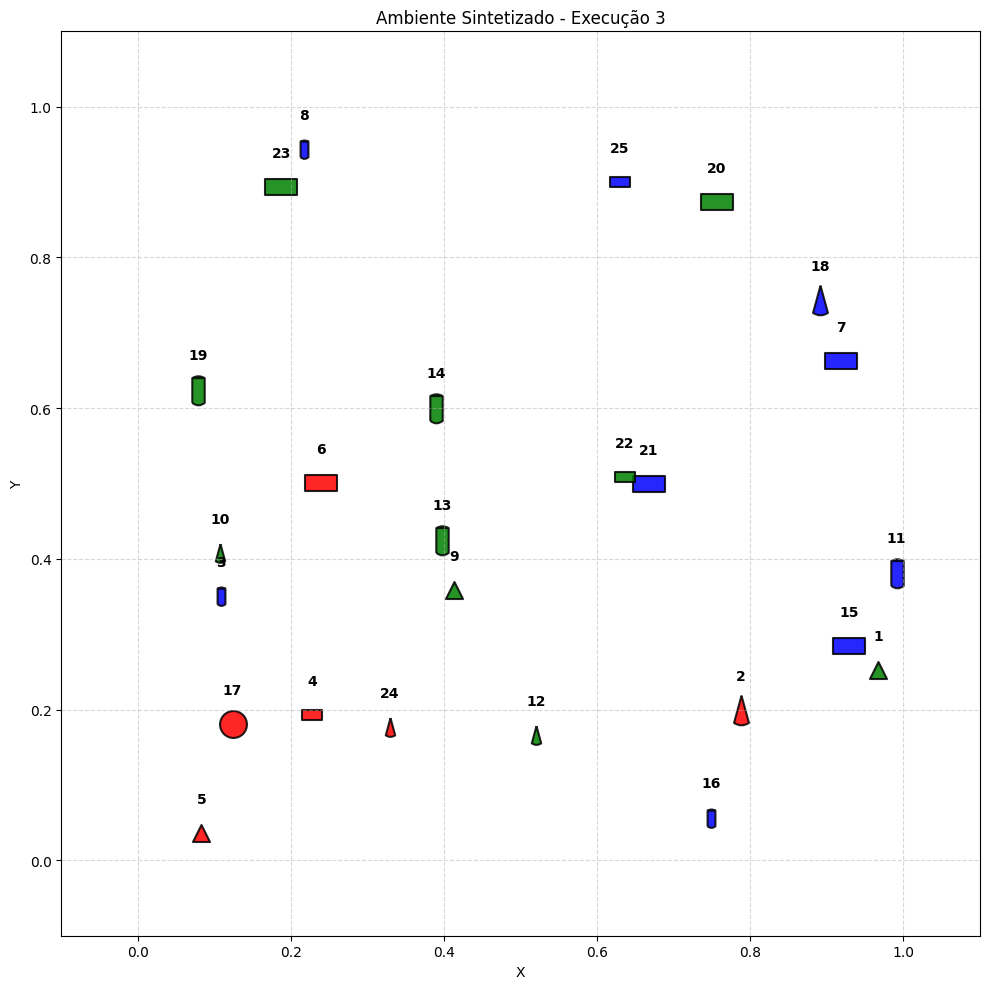

  Satisfação Semântica (Teste): 0.6509
  F1 Precedes:   0.9517
  F1 Beneath:    0.9658

────────────────────────────────────────────────────────────────────────────────
CICLO 4/5
────────────────────────────────────────────────────────────────────────────────
✓ Treinando em ambiente ESTÁTICO...
  Época 0: Loss=7.3553
  Época 200: Loss=0.4496
  Época 400: Loss=0.3782
  Época 600: Loss=0.3707
  Época 800: Loss=0.3685
✓ Gerando ambiente ALEATÓRIO para teste...


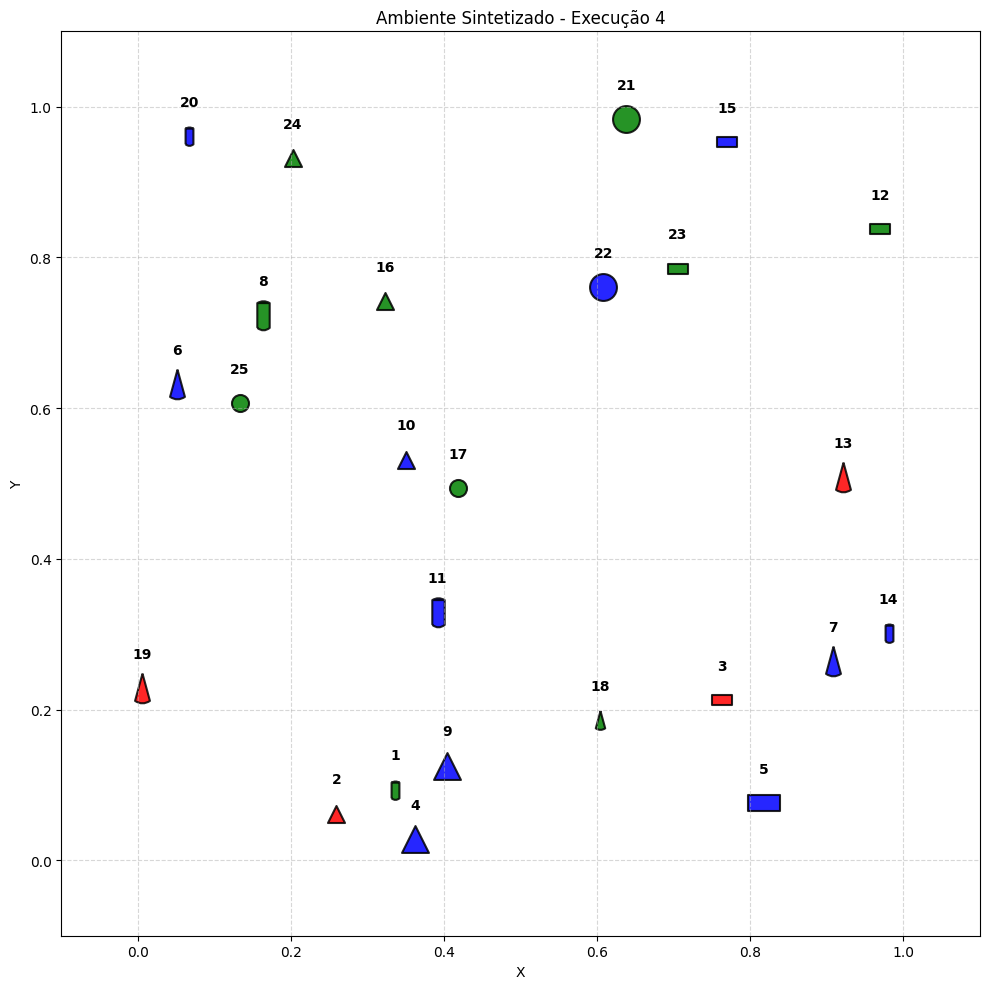

  Satisfação Semântica (Teste): 0.6582
  F1 Precedes:   0.9393
  F1 Beneath:    0.9659

────────────────────────────────────────────────────────────────────────────────
CICLO 5/5
────────────────────────────────────────────────────────────────────────────────
✓ Treinando em ambiente ESTÁTICO...
  Época 0: Loss=7.2991
  Época 200: Loss=0.4593
  Época 400: Loss=0.3804
  Época 600: Loss=0.3715
  Época 800: Loss=0.3690
✓ Gerando ambiente ALEATÓRIO para teste...


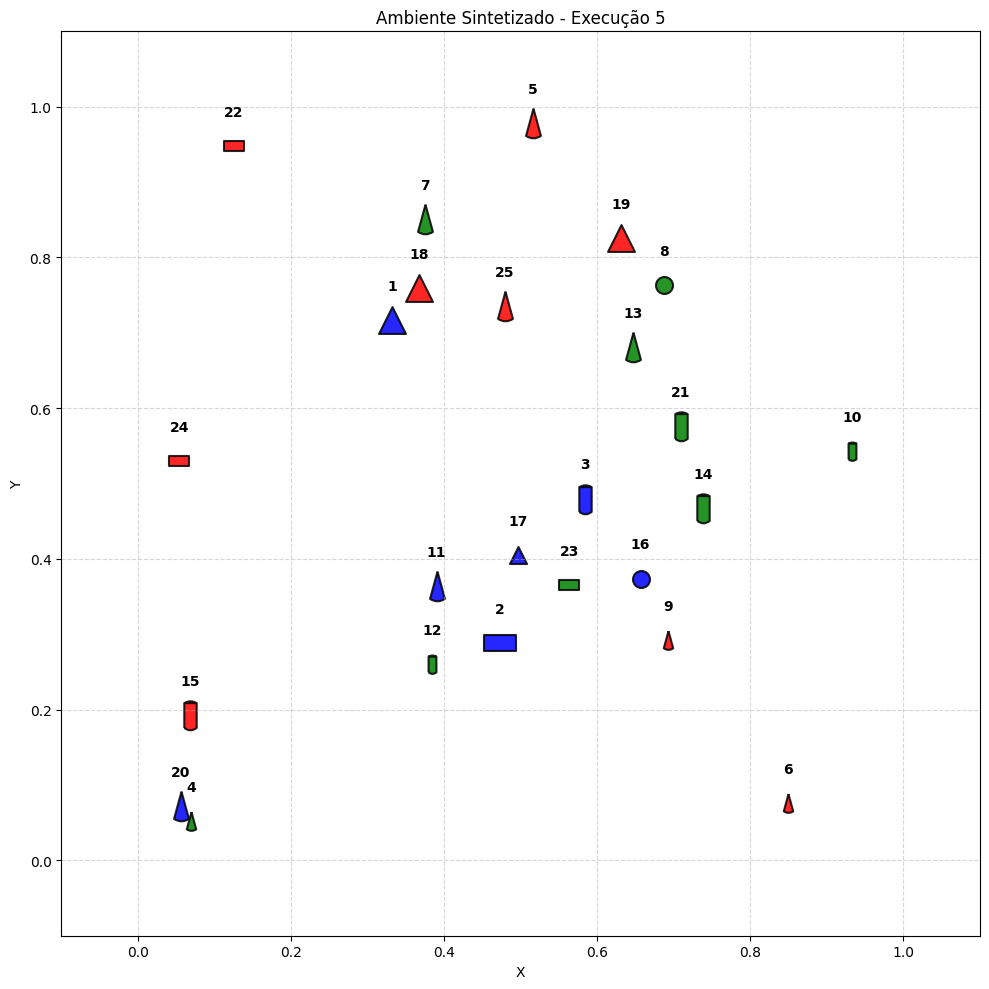

  Satisfação Semântica (Teste): 0.6571
  F1 Precedes:   0.9319
  F1 Beneath:    0.9744


In [ ]:
# =============================================================================
# PROTOCOLO EXPERIMENTAL (TREINO FIXO -> TESTE ALEATÓRIO + RENDERIZAÇÃO)
# =============================================================================
print("\n" + "="*80)
print("PROTOCOLO EXPERIMENTAL: 5 CICLOS (TREINO FIXO vs TESTE ALEATÓRIO)")
print("="*80)

results_summary = []

for run in range(1, 6):
    print(f"\n{'─'*80}")
    print(f"CICLO {run}/5")
    print(f"{'─'*80}")

    # -------------------------------------------------------------------------
    # 1. DADOS DE TREINAMENTO (ESTÁTICOS)
    # -------------------------------------------------------------------------
    base_environment = load_base_scenario()
    scenario_context = ltn.Variable("scenario_context", base_environment)

    # Preparar pares de treino para supervisão
    n = len(base_environment)
    idx1 = torch.repeat_interleave(torch.arange(n, device=device), n)
    idx2 = torch.arange(n, device=device).repeat(n)
    p1_raw = base_environment[idx1]
    p2_raw = base_environment[idx2]

    # Ground Truth Supervisionado (Treino)
    target_precedes = (p1_raw[:, 0] < p2_raw[:, 0]).float().view(-1, 1)
    target_beneath = (p1_raw[:, 1] < p2_raw[:, 1]).float().view(-1, 1)
    bce_loss = torch.nn.BCELoss()

    # -------------------------------------------------------------------------
    # 2. REINICIALIZAR REDES E OTIMIZADOR
    # -------------------------------------------------------------------------
    Precedes = ltn.Predicate(BinaryPredictor().to(device))
    Succeeds = ltn.Predicate(BinaryPredictor().to(device))
    Beneath = ltn.Predicate(BinaryPredictor().to(device))
    Elevated = ltn.Predicate(BinaryPredictor().to(device))
    SameSize = ltn.Predicate(BinaryPredictor().to(device))
    IntermediatePosition = ltn.Predicate(TernaryPredictor().to(device))
    ProximityRelation = ltn.Predicate(ProximityModel().to(device))
    Stackable = ltn.Predicate(StackabilityPredictor().to(device))  # ← NOVO!

    params = (list(Precedes.parameters()) + list(Succeeds.parameters()) +
              list(Beneath.parameters()) + list(Elevated.parameters()) +
              list(SameSize.parameters()) + list(IntermediatePosition.parameters()) +
              list(ProximityRelation.parameters()) +
              list(Stackable.parameters()))  # ← ADICIONE ESTA LINHA

    optimizer = torch.optim.Adam(params, lr=0.001)

    # -------------------------------------------------------------------------
    # 3. TREINAMENTO (1000 ÉPOCAS NOS DADOS FIXOS)
    # -------------------------------------------------------------------------
    print(f"✓ Treinando em ambiente ESTÁTICO...")
    for epoch in range(1000):
        optimizer.zero_grad()
        sat_agg = construct_knowledge_base(scenario_context, Stackable)
        loss_logic = 1.0 - sat_agg
        pred_p = Precedes.model(p1_raw, p2_raw).view(-1, 1)
        pred_b = Beneath.model(p1_raw, p2_raw).view(-1, 1)
        loss_sup = bce_loss(pred_p, target_precedes) + bce_loss(pred_b, target_beneath)
        loss = loss_logic + 5.0 * loss_sup
        loss.backward()
        optimizer.step()

        if epoch % 200 == 0:
            print(f"  Época {epoch}: Loss={loss.item():.4f}")

    # -------------------------------------------------------------------------
    # 4. AVALIAÇÃO EM DADOS DE TESTE (ALEATÓRIOS)
    # -------------------------------------------------------------------------
    print(f"✓ Gerando ambiente ALEATÓRIO para teste...")

    # Gera novos dados aleatórios
    eval_environment = generate_test_environment(25)

    # --- PLOTAGEM DO AMBIENTE ---
    visualize_spatial_layout(eval_environment, run)
    # ----------------------------

    test_context = ltn.Variable("test_context", eval_environment)

    # Preparar pares do TESTE
    p1_test = eval_environment[idx1]
    p2_test = eval_environment[idx2]

    # Predições da Rede nos dados de TESTE
    pred_precedes_eval = Precedes.model(p1_test, p2_test).detach().cpu().numpy().flatten()
    pred_beneath_eval = Beneath.model(p1_test, p2_test).detach().cpu().numpy().flatten()

    # Ground Truth do TESTE
    gt_precedes = compute_semantic_truth(eval_environment, 'Precedes')
    gt_beneath = compute_semantic_truth(eval_environment, 'Beneath')

    # Métricas
    acc_precedes, prec_precedes, rec_precedes, f1_precedes = evaluate_performance_metrics(gt_precedes, pred_precedes_eval)
    acc_beneath, prec_beneath, rec_beneath, f1_beneath = evaluate_performance_metrics(gt_beneath, pred_beneath_eval)

    final_sat_test = construct_knowledge_base(test_context, Stackable).item()
    print(f"  Satisfação Semântica (Teste): {final_sat_test:.4f}")
    print(f"  F1 Precedes:   {f1_precedes:.4f}")
    print(f"  F1 Beneath:    {f1_beneath:.4f}")

    # 5. Queries
    x = test_context
    y = ltn.Variable("y", eval_environment)
    z = ltn.Variable("z", eval_environment)

    q1 = Exists(x, And(IsMinute(x), And(Exists(y, And(ShapeCylindrical(y), Beneath(x, y))), Exists(z, And(ShapePrismatic(z), Precedes(x, z))))))
    q2 = Exists([x, y, z], And(ShapeConical(x), And(HasGreen(x), IntermediatePosition(x, y, z))))
    q3 = Forall([x, y], Implies(And(ShapeWedged(x), And(ShapeWedged(y), ProximityRelation(x, y))), SameSize(x, y)))
    # Query 4: Verifica se objetos massivos podem ser empilhados sobre bases estáveis
    q4 = Forall([x, y], Implies(
      And(IsMassive(x), Or(ShapePrismatic(y), ShapeCylindrical(y))),
      Stackable(x, y)
        ))

    results_summary.append({
    'Run': run,
    'Sat_KB': final_sat_test,
    'Precedes_F1': f1_precedes,
    'Beneath_F1': f1_beneath,
    'Query1_Sat': q1.value.item(),
    'Query2_Sat': q2.value.item(),
    'Query3_Sat': q3.value.item(),
    'Query4_Sat': q4.value.item()  # ← ADICIONE
})


### Consolidação Final do Treinamento


- **Satisfação Semântica (Sat_KB):** obtida por `construct_knowledge_base(test_context)`. Retorna um escalar fuzzy em [0,1] (quanto mais próximo de 1, melhor os axiomas são satisfeitos no cenário). No código usamos `final_sat_test = construct_knowledge_base(test_context).item()` para extrair o número.

- **Ground Truth (GT):** a função `compute_semantic_truth(data, relation_type)` gera rótulos binários para todos os pares (i,j):
  - `Precedes` → compara `pos_x[i] < pos_x[j]`
  - `Beneath`   → compara `pos_y[i] < pos_y[j]`
  - `SameSize`→ compara a coluna de tamanho (índice 10)
  - Retorna um array de 0/1 com o tamanho N*N (pares ordenados).

- **Predições das redes:** as redes retornam probabilidades em [0,1]. Antes das métricas, `evaluate_performance_metrics` converte essas probabilidades em rótulos binários com limiar `> 0.5` (`y_pred = (y_pred_prob > 0.5).astype(int)`).

- **Cálculo das métricas:** `evaluate_performance_metrics(y_true, y_pred_prob)` faz:
  - converte tensores para numpy e flatten, aplica threshold 0.5, e retorna `(accuracy, precision, recall, f1_score)`;
  - usa `zero_division=0` para evitar exceções quando não há positivos preditos/verdadeiros.

- **Interpretação prática:** F1 próximo de 1.0 indica bom equilíbrio entre precisão e recall; o notebook marca `F1 > 0.95` como excelente. A combinação entre `Sat_KB` e métricas supervised permite avaliar tanto consistência lógica quanto desempenho pontual nas relações espaciais.

- **Observações de implementação:** as predições são `flatten()` e comparadas com o GT; o limiar (0.5) e o peso `5.0` na loss supervisionada influenciam diretamente as métricas finais e a satisfação da KB.


In [ ]:
# =============================================================================
# AGREGAÇÃO CONSOLIDADA DE RESULTADOS EXPERIMENTAIS
# =============================================================================
print("\n" + "="*95)
print("AGREGAÇÃO CONSOLIDADA DOS 5 CICLOS EXPERIMENTAIS")
print("="*95)
print(f"{'Run':<4} | {'Sat KB':<8} | {'Prec F1':<8} | {'Beneath F1':<8} | {'Q1':<8} | {'Q2':<8} | {'Q3':<8} | {'Q4':<8}")
print("-" * 105)

avg_sat = []
avg_f1_precedes = []
avg_f1_beneath = []

for res in results_summary:
    print(f"{res['Run']:<4} | {res['Sat_KB']:<8.4f} | {res['Precedes_F1']:<8.4f} | {res['Beneath_F1']:<8.4f} | {res['Query1_Sat']:<8.4f} | {res['Query2_Sat']:<8.4f} | {res['Query3_Sat']:<8.4f} | {res['Query4_Sat']:<8.4f}")
    avg_sat.append(res['Sat_KB'])
    avg_f1_precedes.append(res['Precedes_F1'])
    avg_f1_beneath.append(res['Beneath_F1'])



print("-" * 95)
print(f"{'AVG':<4} | {np.mean(avg_sat):<8.4f} | {np.mean(avg_f1_precedes):<8.4f} | {np.mean(avg_f1_beneath):<8.4f}")
print("="*95)



AGREGAÇÃO CONSOLIDADA DOS 5 CICLOS EXPERIMENTAIS
Run  | Sat KB   | Prec F1  | Beneath F1 | Q1       | Q2       | Q3       | Q4      
---------------------------------------------------------------------------------------------------------
1    | 0.6464   | 0.9366   | 0.9604   | 0.0722   | 0.2205   | 0.9996   | 0.6255  
2    | 0.6623   | 0.9296   | 0.9404   | 0.0689   | 0.2790   | 0.9995   | 0.6027  
3    | 0.6509   | 0.9517   | 0.9658   | 0.1334   | 0.1663   | 0.9994   | 0.4241  
4    | 0.6582   | 0.9393   | 0.9659   | 0.0810   | 0.1727   | 0.9993   | 0.5813  
5    | 0.6571   | 0.9319   | 0.9744   | 0.0443   | 0.2239   | 0.9997   | 0.5277  
-----------------------------------------------------------------------------------------------
AVG  | 0.6550   | 0.9378   | 0.9614  


## 12. Análise Profunda dos Resultados Experimentais

### 📋 Agregação Consolidada dos 5 Ciclos (Dados Reais)

**Tabela de Resultados Consolidados:**
```
Run  | Sat KB   | Prec F1  | Beneath F1 | Q1       | Q2       | Q3       | Q4      
-----+----------+----------+----------+----------+----------+----------+----------
1    | 0.6464   | 0.9366   | 0.9604   | 0.0722   | 0.2205   | 0.9996   | 0.6255  
2    | 0.6623   | 0.9296   | 0.9404   | 0.0689   | 0.2790   | 0.9995   | 0.6027  
3    | 0.6509   | 0.9517   | 0.9658   | 0.1334   | 0.1663   | 0.9994   | 0.4241  
4    | 0.6582   | 0.9393   | 0.9659   | 0.0810   | 0.1727   | 0.9993   | 0.5813  
5    | 0.6571   | 0.9319   | 0.9744   | 0.0443   | 0.2239   | 0.9997   | 0.5277  
-----+----------+----------+----------+----------+----------+----------+----------
AVG  | 0.6550   | 0.9378   | 0.9614   |    —     |    —     |    —     |    —    
```
